Amazon Prime Movies and TV Shows

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving amazon_prime_titles.csv to amazon_prime_titles.csv


In [5]:
file_name = 'amazon_prime_titles.csv'
df = pd.read_csv(file_name)

Data description

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB
None


Handling null values

In [6]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64


In [7]:
df['director'].fillna('No Director', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['country'].fillna('No Country', inplace=True)
df['date_added'].fillna('Unknown Date', inplace=True)
df['rating'].fillna('No Rating', inplace=True)

In [8]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [13]:
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')
df_cleaned = df.drop_duplicates()

Duplicates: 0


In [14]:
print(df_cleaned.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [16]:
df_cleaned[['duration_num', 'duration_unit']] = df_cleaned['duration'].str.extract(r'(\d+)\s*(\D+)', expand=True)
df_cleaned['duration_num'] = pd.to_numeric(df_cleaned['duration_num'])
print(df_cleaned.dtypes)

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
duration_num      int64
duration_unit    object
dtype: object


Exploratory Data Analysis

Histogram

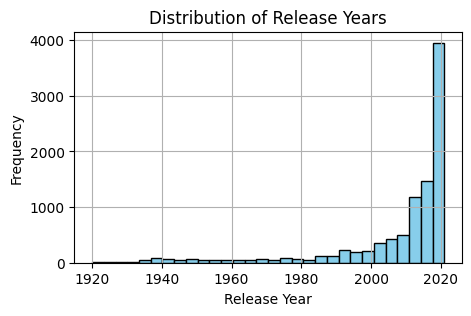

In [21]:
plt.figure(figsize=(5, 3))
plt.hist(df_cleaned['release_year'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Years')
plt.grid(True)
plt.show()

Boxplot

<ipython-input-24-6a48bc3f1782>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['type'], y=df_cleaned['release_year'], palette='viridis')


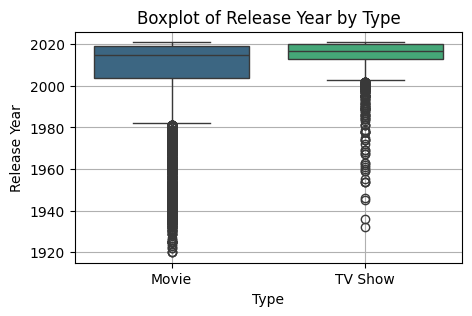

In [24]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_cleaned['type'], y=df_cleaned['release_year'], palette='viridis')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.title('Boxplot of Release Year by Type')
plt.grid(True)
plt.show()

Bar Plots

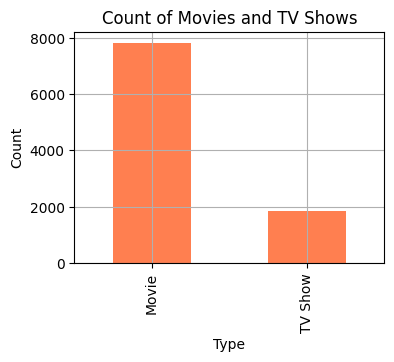

In [27]:
plt.figure(figsize=(4, 3))
df_cleaned['type'].value_counts().plot(kind='bar', color='coral')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Movies and TV Shows')
plt.grid(True)
plt.show()

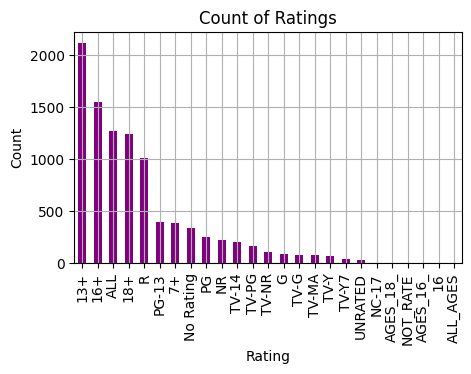

In [28]:
plt.figure(figsize=(5, 3))
df_cleaned['rating'].value_counts().plot(kind='bar', color='purple')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings')
plt.grid(True)
plt.show()

Heatmaps

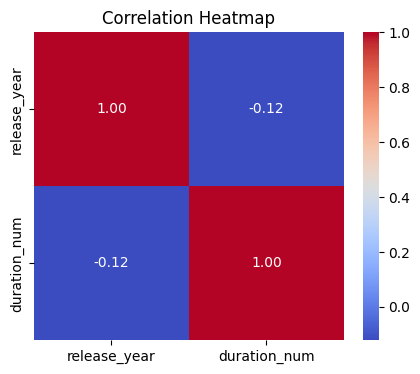

In [30]:
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_cleaned[numeric_cols].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [37]:
unique_counts = df_cleaned.nunique()
print(unique_counts)

show_id          9668
type                2
title            9668
director         5774
cast             7928
country            87
date_added         85
release_year      100
rating             25
duration          219
listed_in         518
description      9414
duration_num      202
duration_unit       3
dtype: int64


Piechart

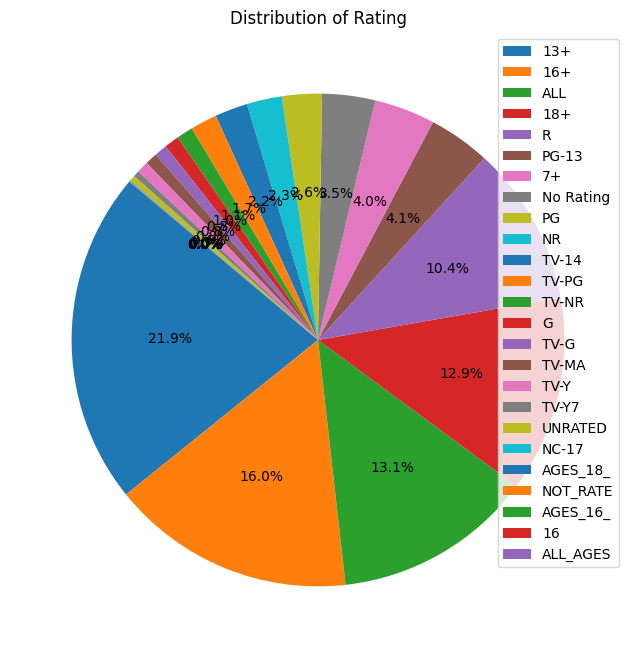

In [44]:
rating_counts = df_cleaned['rating'].value_counts()

plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(rating_counts, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Rating')
plt.gca().set_aspect('equal')

for i, text in enumerate(texts):
    angle = (wedges[i].theta2 - wedges[i].theta1) / 2. + wedges[i].theta1
    x = wedges[i].r * 1.5 * (1 if angle < 180 else -1)
    y = wedges[i].r * 1.5 * (1 if angle < 90 or angle > 270 else -1)
    ha = "left" if angle < 180 else "right"
    plt.annotate(text.get_text(), xy=(x, y), ha=ha, va='center')
    text.set_text('')  # Remove the original text from the pie

# Create a legend
plt.legend(rating_counts.index, loc='upper right')

plt.show()
